<a href="https://colab.research.google.com/github/sultanbst123/MachineHack-Predicting_Weather/blob/main/Predicting_weather(modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Library & File

In [ ]:

!pip install catboost
!pip install ngboost
!pip install optuna
!pip install borutashap

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from BorutaShap import BorutaShap
 
# classification
import xgboost, lightgbm, catboost, ngboost

from xgboost import XGBClassifier
from ngboost import NGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, StackingClassifier, GradientBoostingClassifier,
                             AdaBoostClassifier, HistGradientBoostingClassifier) 

# regression
from xgboost import XGBRegressor
from ngboost import NGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                             AdaBoostRegressor, HistGradientBoostingRegressor) 

#preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,f1_score, 
                            log_loss, roc_auc_score, plot_roc_curve,plot_confusion_matrix) 
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.calibration import CalibrationDisplay


import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Predicting weather/train_PredictingWeather(clean).csv")
test = pd.read_csv("/content/drive/MyDrive/Predicting weather/test_PredictingWeather(clean).csv")

In [ ]:
train.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,has-gill-color,has-gill-attachment,has-stem-color
0,p,5.75,x,n,t,s,w,6.13,14.93,w,f,f,d,a,t,t,t
1,p,2.27,o,g,f,f,f,0.00,0.00,f,f,f,d,s,f,f,f
2,p,5.59,c,y,t,x,p,5.47,11.27,w,f,f,d,a,t,t,t
3,p,0.74,x,p,f,a,n,4.33,0.98,k,f,f,d,a,t,t,t
4,p,9.60,x,n,f,a,w,10.84,28.52,w,f,f,d,u,t,t,t


In [ ]:
##

## Split data & Coba dengan LGBM

In [ ]:

x = train.drop("season",axis=1) 
y = train.season

In [ ]:
# ubah object ke category

cater = x.select_dtypes("object").columns

In [ ]:
x[cater] = x[cater].astype("category")

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
lg = LGBMClassifier(random_state=42) 
lg.fit(x_train, y_train)

LGBMClassifier(random_state=42)

In [ ]:
print(f"Val accuracy: {np.round(lg.score(x_val, y_val),2)}%") 
print(f"Train accuracy: {np.round(lg.score(x_train, y_train),2)}%")

Val accuracy: 0.51%
Train accuracy: 0.63%


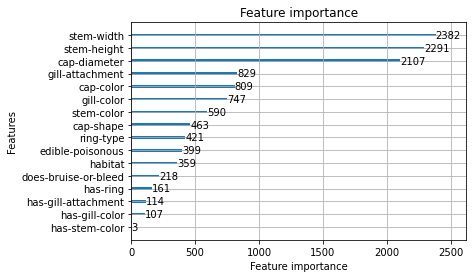

In [ ]:
## check feature important
lightgbm.plot_importance(lg)

## Feature Selection

In [ ]:

# guanakan lightgbm untuk feature important

fs = BorutaShap(model=lg,
                importance_measure="shap",
                classification = True)

In [ ]:
fs.fit(X=x_train, y=y_train, n_trials=5,random_state=0)

  0%|          | 0/5 [00:00<?, ?it/s]

0 attributes confirmed important: []
0 attributes confirmed unimportant: []
16 tentative attributes remains: ['ring-type', 'cap-shape', 'gill-attachment', 'stem-width', 'edible-poisonous', 'stem-height', 'gill-color', 'has-ring', 'has-stem-color', 'does-bruise-or-bleed', 'habitat', 'cap-diameter', 'stem-color', 'has-gill-color', 'cap-color', 'has-gill-attachment']


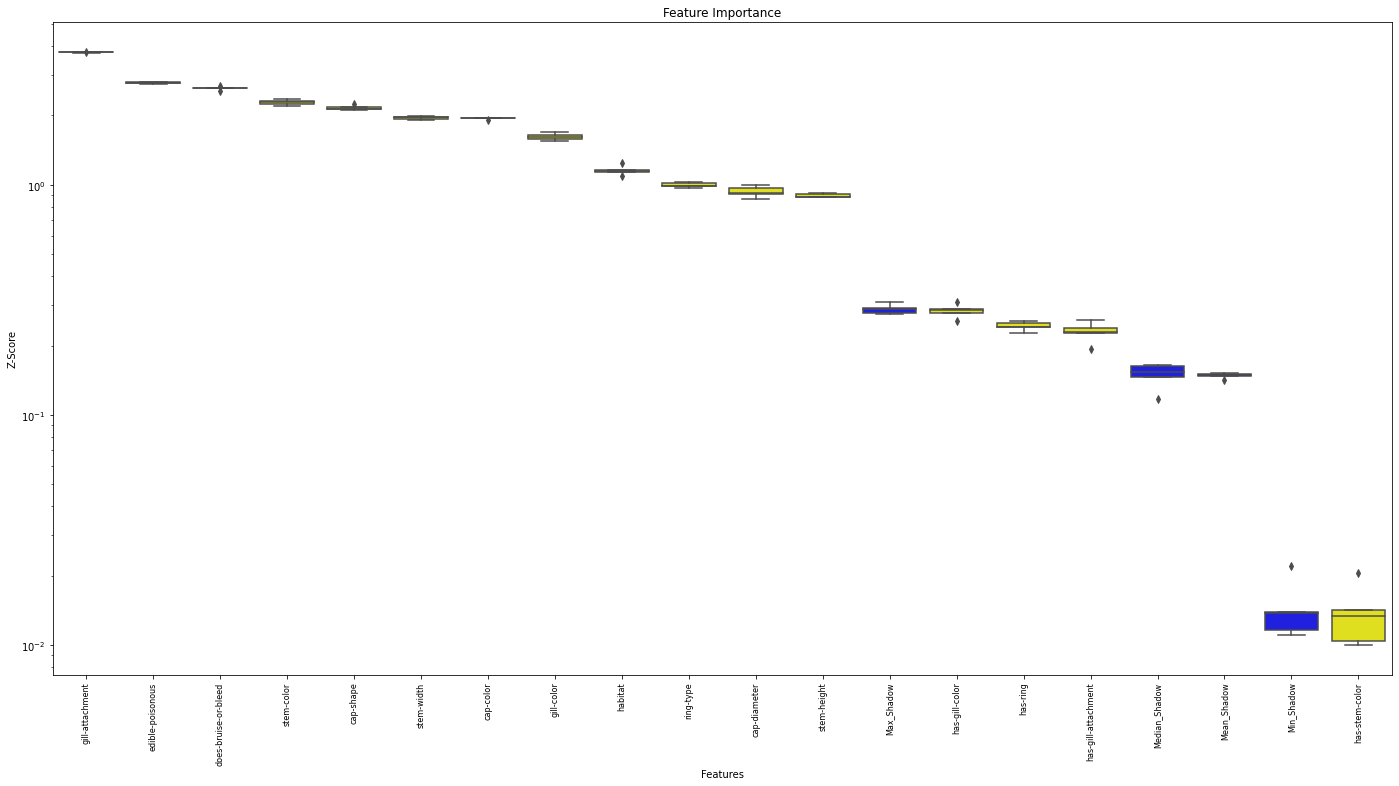

In [ ]:
fs.plot(which_features='all', figsize=(24,12))

In [ ]:
# tidak ada yang penting dan tidak penting di antara fitur, berdasarkan boruta shape feature selection

## Tree Models

In [ ]:
train_acc = []
val_acc = []

In [ ]:
CB = CatBoostClassifier(random_state=12)
LGBM = LGBMClassifier(random_state=14)

In [ ]:
def score_1(model,x_train, y_train, x_val, y_val):
       
    #lgbm
    if model == LGBM:
       #fit model
       model.fit(x_train,y_train,verbose=False)

       #accuracy
       train_acc.append(model.score(x_train,y_train))
       val_acc.append(model.score(x_val,y_val)) 
       
   #catboost
    else:         
       #fit model    
       model.fit(x_train,y_train,cat_features=cater.to_list(),verbose=False)

       #accuracy
       train_acc.append(model.score(x_train,y_train))
       val_acc.append(model.score(x_val,y_val)) 
       
    return model

In [ ]:
for i in [CB,LGBM]:
    print(30*"-")
    print(i)
    score_1(i, x_train, y_train, x_val, y_val)
    print(10*"->" + " DONE")

------------------------------
->->->->->->->->->-> DONE
------------------------------
LGBMClassifier(random_state=14)
->->->->->->->->->-> DONE


In [ ]:
# untuk model pohon lain nya

In [ ]:
x_train_1 = x_train.copy() 
x_val_1 = x_val.copy()

In [ ]:

# ubah ke nominal untuk fitur category

le = {}
for i in cater:
    le[i] = LabelEncoder()
    x_train_1[i] = le[i].fit_transform(x_train_1[i]) 
    x_val_1[i] = le[i].transform(x_val_1[i])

In [ ]:
x_val_1.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,has-gill-color,has-gill-attachment,has-stem-color
31093,1,3.73,2,1,0,2,5,4.38,3.52,11,1,0,4,1,1,1
9162,0,0.70,4,10,0,3,3,2.42,1.22,11,0,1,0,1,0,1
1121,1,3.55,0,2,0,0,5,9.94,2.46,6,0,1,1,1,1,1
2746,0,10.62,5,10,1,1,10,6.05,24.49,11,0,1,0,1,1,1
33928,0,6.10,5,6,0,1,0,6.00,12.28,11,0,1,0,1,1,1


In [ ]:
EXT = ExtraTreeClassifier(random_state=50)
RF = RandomForestClassifier(random_state=60)
DT = DecisionTreeClassifier(random_state=70)

XGB = XGBClassifier(random_state=10)
GBT = GradientBoostingClassifier(random_state=20)
HGBT = HistGradientBoostingClassifier(random_state=30)
ADA = AdaBoostClassifier(random_state=40)
#NGB = NGBClassifier(random_state=65,verbose=False)

In [ ]:
def score_2(model,x_train, y_train, x_val, y_val):
    #fit model    
    model.fit(x_train,y_train)

    #accuracy
    train_acc.append(model.score(x_train,y_train))
    val_acc.append(model.score(x_val,y_val))
       
    return model

In [ ]:
for i in [XGB,ADA,GBT,HGBT,DT,RF,EXT]:
    print(30*"-")
    print(i)
    score_2(i, x_train_1, y_train, x_val_1, y_val)
    print(10*"->" + " DONE")

------------------------------
XGBClassifier(random_state=10)
->->->->->->->->->-> DONE
------------------------------
AdaBoostClassifier(random_state=40)
->->->->->->->->->-> DONE
------------------------------
GradientBoostingClassifier(random_state=20)
->->->->->->->->->-> DONE
------------------------------
HistGradientBoostingClassifier(random_state=30)
->->->->->->->->->-> DONE
------------------------------
DecisionTreeClassifier(random_state=70)
->->->->->->->->->-> DONE
------------------------------
RandomForestClassifier(random_state=60)
->->->->->->->->->-> DONE
------------------------------
ExtraTreeClassifier(random_state=50)
->->->->->->->->->-> DONE


## Models Selection

In [ ]:
all_models = pd.DataFrame({"models": ["CB","LGBM", "XGB", "ADA", "GBT", "HGBT", "DT", "RF", "EXT"],
                          "Train_accuracy": train_acc, 
                          "Val_accuracy": val_acc})

In [ ]:
all_models.sort_values("Val_accuracy", ascending = False)

,models,Train_accuracy,Val_accuracy
2,XGB,0.529289,0.513596
7,RF,0.997333,0.513596
8,EXT,0.997363,0.513127
6,DT,0.997363,0.512775
4,GBT,0.540454,0.512072
1,LGBM,0.626051,0.511838
0,CB,0.596044,0.511252
5,HGBT,0.664059,0.507384
3,ADA,0.476747,0.469058


## Hyperparameters - tuning

In [ ]:

#xgboost

def objective(trial):
    
    params = {
        #"tree_method": trial.suggest_categorical("tree_method",["gpu_hist"]), 
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),       
        #"objective": "reg:squarederror",
        "n_estimators": trial.suggest_categorical("n_estimators",[10000]),
        "gamma": trial.suggest_int("gamma", 0,5), 
        "eta": trial.suggest_loguniform("eta",1e-2,0.1),
        "reg_alpha": trial.suggest_int("reg_alpha",1,50),
        "reg_lambda": trial.suggest_int("reg_lambda",5,100),
        "max_depth": trial.suggest_int("max_depth",1,10),
    }
    model = XGBClassifier(**params)      
    model.fit(x_train_1,y_train,eval_set=[(x_val_1,y_val)],verbose=False,early_stopping_rounds=100)

    y_preds = model.predict(x_val_1)   
    accuracy = accuracy_score(y_val, y_preds)

    return accuracy

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2022-01-21 13:09:33,344] A new study created in memory with name: no-name-67af0ea1-2f4b-435e-87e0-088366ce7a27
[I 2022-01-21 13:10:42,573] Trial 0 finished with value: 0.5178152836380685 and parameters: {'lambda': 0.0018639172509050416, 'alpha': 0.33222646129548844, 'colsample_bytree': 0.9, 'subsample': 0.7, 'min_child_weight': 154, 'n_estimators': 10000, 'gamma': 5, 'eta': 0.01623981881685026, 'reg_alpha': 48, 'reg_lambda': 20, 'max_depth': 8}. Best is trial 0 with value: 0.5178152836380685.
[I 2022-01-21 13:11:16,155] Trial 1 finished with value: 0.5185185185185185 and parameters: {'lambda': 0.12932770265086466, 'alpha': 0.004836885213771091, 'colsample_bytree': 0.9, 'subsample': 0.8, 'min_child_weight': 163, 'n_estimators': 10000, 'gamma': 3, 'eta': 0.07310660203938195, 'reg_alpha': 38, 'reg_lambda': 24, 'max_depth': 4}. Best is trial 1 with value: 0.5185185185185185.
[I 2022-01-21 13:11:55,772] Trial 2 finished with value: 0.5167604313173934 and parameters: {'lambda': 6.34131816

In [ ]:
xgb_params = study.best_trial.params
xgb_params

{'alpha': 0.07886435539210188,
 'colsample_bytree': 0.7,
 'eta': 0.06642066306283866,
 'gamma': 2,
 'lambda': 1.8641502304234356,
 'max_depth': 10,
 'min_child_weight': 36,
 'n_estimators': 10000,
 'reg_alpha': 1,
 'reg_lambda': 84,
 'subsample': 1.0}

## Cross validation

In [ ]:

# Cross validation for xgboost

def cross_val(X, y, model, params, folds=7):

    score = []
    
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=21)

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold+1}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
        
        #fit
        alg = model(**params,random_state=2021)
        alg.fit(x_train,y_train,eval_set=[(x_test,y_test)],verbose=False,early_stopping_rounds=100)

        #predict validation
        pred = alg.predict(x_test)
        acc = accuracy_score(y_test, pred)
        score.append(acc)
        
        print(f" Accuracy: {acc}")
        print("-"*50)
     
    print("\nmean accuracy:",np.array(score).mean())

    return alg

In [ ]:
#buat data baru 

x_new = pd.concat([x_train_1, x_val_1]) 
y_new = pd.concat([y_train, y_val])

In [ ]:
xgb_score = cross_val(x_new, y_new, XGBClassifier, xgb_params)

Fold: 1
 Accuracy: 0.523629799803085
--------------------------------------------------
Fold: 2
 Accuracy: 0.5167377748605185
--------------------------------------------------
Fold: 3
 Accuracy: 0.5277321956022317
--------------------------------------------------
Fold: 4
 Accuracy: 0.529865441417788
--------------------------------------------------
Fold: 5
 Accuracy: 0.5297013455858222
--------------------------------------------------
Fold: 6
 Accuracy: 0.5136199540531671
--------------------------------------------------
Fold: 7
 Accuracy: 0.5187920564582308
--------------------------------------------------

mean accuracy: 0.5228683668258347


In [ ]:
## coba data validation

In [ ]:


prob_pred = xgb_score.predict_proba(x_val_1)
pred = xgb_score.predict(x_val_1)

In [ ]:
accuracy_score(y_val, pred)

0.5505157055789968

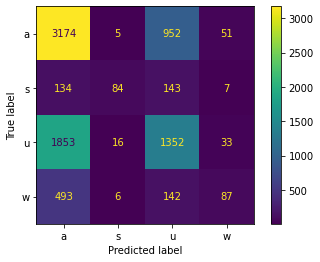

In [ ]:
plot_confusion_matrix(xgb_score, x_val_1, y_val)

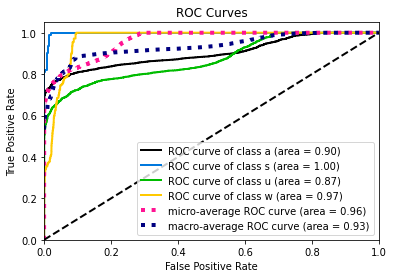

In [ ]:
import scikitplot as skp
skp.metrics.plot_roc(pred, prob_pred)

In [ ]:
classification_report(y_val, pred)

'              precision    recall  f1-score   support\n\n           a       0.56      0.76      0.65      4182\n           s       0.76      0.23      0.35       368\n           u       0.52      0.42      0.46      3254\n           w       0.49      0.12      0.19       728\n\n    accuracy                           0.55      8532\n   macro avg       0.58      0.38      0.41      8532\nweighted avg       0.55      0.55      0.52      8532\n'

In [ ]:
## buat file submission

In [ ]:

# ubah ke nominal untuk fitur category

for i in cater:
      test[i] = le[i].transform(test[i])

In [ ]:
test.drop("season",axis=1, inplace=True)

In [ ]:
test

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,has-gill-color,has-gill-attachment,has-stem-color
0,0,4.68,6,10,0,6,10,8.22,9.58,6,1,1,1,1,1,1
1,1,10.33,6,11,0,0,11,11.98,13.29,12,1,1,0,1,1,1
2,1,9.26,6,10,1,3,10,7.41,12.68,11,1,3,1,1,0,1
3,1,14.90,5,10,1,1,10,5.33,23.03,11,0,1,0,1,1,1
4,1,1.01,6,10,0,0,10,3.17,1.64,1,0,1,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18316,0,8.59,3,5,0,3,10,4.11,19.54,6,0,1,0,1,0,1
18317,0,7.23,5,10,0,1,7,3.56,9.42,11,0,1,0,1,1,1
18318,0,6.82,6,11,1,6,11,7.00,14.29,11,0,1,0,1,1,1
18319,1,4.51,6,5,0,5,7,6.25,9.97,11,1,7,0,1,1,1


In [ ]:
y_true = xgb_score.predict(test)

In [ ]:
y_true

array(['a', 'a', 'u', ..., 'a', 'a', 'u'], dtype=object)

In [ ]:
sub = pd.read_csv("/content/drive/MyDrive/Predicting weather/sample_submission.csv")

In [ ]:
sub["season"] = y_true

In [ ]:
sub

,season
0,a
1,a
2,u
3,a
4,u
...,...
18316,a
18317,u
18318,a
18319,a


In [ ]:
sub.to_csv("submission.csv", index=False)